<a href="https://colab.research.google.com/github/mohammadhossein-kr/AI-vs.-AI/blob/main/AI%20vs.%20AI%20-%20Cat%20%26%20Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Load dataset

cats_train = np.load("/content/drive/My Drive/Nikparvar/AI in Astronomy/cat_train.npy")
cats_test = np.load("/content/drive/My Drive/Nikparvar/AI in Astronomy/cat_test.npy")
dogs_train = np.load("/content/drive/My Drive/Nikparvar/AI in Astronomy/dog_train.npy")
dogs_test = np.load("/content/drive/My Drive/Nikparvar/AI in Astronomy/dog_test.npy")

x_train = np.concatenate((cats_train,dogs_train),axis=0)
x_test = np.concatenate((cats_test,dogs_test),axis=0)

y_train = np.concatenate((np.zeros(len(cats_train)),np.ones(len(dogs_train))),axis=0)
y_test = np.concatenate((np.zeros(len(cats_test)),np.ones(len(dogs_test))),axis=0)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

1.0


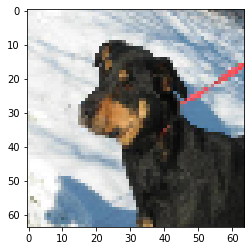

In [ ]:
#Sample image
plt.imshow(x_test[1999])
print(y_test[1999])

0.0


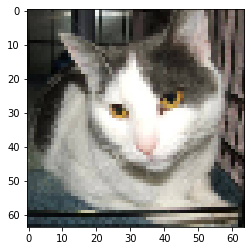

In [ ]:
#Sample image
plt.imshow(x_test[299])
print(y_test[299])

In [ ]:
#Print the value of image
print(x_train[0])

In [ ]:
#Normalization
x_train = x_train/255.
x_test = x_test/255.
print(np.max(x_train))

#x_train = x_train.reshape((8000,64,64,3))
#x_test = x_test.reshape((2000,64,64,3))

1.0


In [ ]:
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

print(y_train[0])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[0])

0.0
[1. 0.]


In [ ]:
#Suffle
from numpy import random
from sklearn import utils
shuffler = np.random.permutation(len(x_train))
x_train = x_train[shuffler]
y_train = y_train[shuffler]
x_train, y_train = utils.shuffle(x_train, y_train)

shuffler = np.random.permutation(len(x_test))
x_test = x_test[shuffler]
y_test = y_test[shuffler]
x_test, y_test = utils.shuffle(x_test, y_test)



[1. 0.]


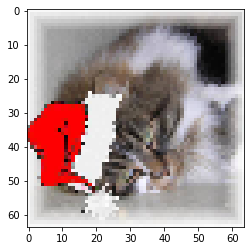

In [ ]:
#Sample image
plt.imshow(x_test[299])
print(y_test[299])

In [ ]:
#Final Shapes
print(y_train.shape)
print(x_train.shape)

print(y_test.shape)
print(x_test.shape)

(8000, 2)
(8000, 64, 64, 3)
(2000, 2)
(2000, 64, 64, 3)


In [ ]:
#Model implemnation
# from keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D, Dense, Dropout
from keras.layers import LeakyReLU, Flatten
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2DTranspose

input_layer = Input(shape=(64,64,3))
c1 = Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(input_layer)
c2 = Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu')(c1)
c3 = Conv2D(filters=64,kernel_size=3,strides=2,padding='same',activation='relu')(c2)
c4 = Conv2D(filters=64,kernel_size=3,strides=2,padding='same',activation='relu')(c3)
flat = Flatten()(c4)
d = Dropout(rate=0.2)(flat)
l1 = Dense(units=50,activation="relu")(d)
l2 = Dense(units=60,activation="relu")(l1)
l3 = Dense(units=60,activation="relu")(l2)
l4 = Dense(units=50,activation="relu")(l3)
output = Dense(units=2,activation="softmax")(l4)

model = Model(input_layer,output)
model.summary()
#plot_model(model,show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dropout (Dropout)            (None, 16384)             0     

In [ ]:

opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics = ["accuracy"])
#Data augmentation
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rescale=None, rotation_range=90, zoom_range=[0.75, 1.25], 
                         width_shift_range=0.25, height_shift_range=0.25, 
                         shear_range=0.15, horizontal_flip=True, 
                         vertical_flip=True, zca_whitening=False, fill_mode='nearest')
batch_size=128
# Finally create generator
gen_flow = aug.flow(x_train,y_train,  batch_size=batch_size,seed=666)
model.fit(x=x_train,y=y_train,epochs=40,batch_size =50,validation_data=[x_test,y_test])

accuracy is: 0.702
[1 0]
[9.9997067e-01 2.9285664e-05]
[1 0]


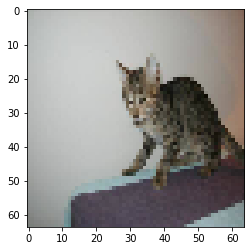

In [ ]:
#Test the model
Test_number = 14

pred = model.predict(x_test)
print("accuracy is:",np.mean(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1)))
plt.imshow(x_test[Test_number].reshape((64,64,3)),cmap='gray')
right_value=(y_test[Test_number]>0.5).astype("int")
print(right_value)
pred = model.predict(x_test)
print(pred[Test_number])
b_value=(pred[Test_number]>0.5).astype("int")
print(b_value)

Group: Masouman, Nikjeh & Karimipour